# Ch5 Resampling Methods
>* Cross Validation
>* The bootstrap

## The Validation Set Approach

In [23]:
#Load Modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [24]:
auto= pd.read_csv('Dataset/Auto.csv')
auto.horsepower.head()
auto['hp']= auto.horsepower.replace('?',None, regex=True).astype(float)

In [25]:
x= auto['hp']
y= auto['mpg']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.5, random_state=30)

In [26]:
from sklearn.linear_model import LinearRegression
ols= LinearRegression()
ols.fit(x_train[:,None], y_train)
pred= ols.predict(x_test[:,None])

In [27]:
mean_squared_error(y_test, pred)

22.937960501815976

The estimated test MSE for the linear regression fit is 22.94

In [28]:
poly2= PolynomialFeatures(degree=2)
x2_train= poly2.fit_transform(x_train[:,None])
x2_test= poly2.fit_transform(x_test[:,None])

In [29]:
ols2= ols.fit(x2_train, y_train)
pred2= ols2.predict(x2_test)
mean_squared_error(y_test, pred2)

18.79116015307682

The estimated test MSE for the poly regression fit is 18.79

In [30]:
poly3= PolynomialFeatures(degree=3)
x3_train= poly3.fit_transform(x_train[:,None])
x3_test= poly3.fit_transform(x_test[:,None])
ols3= ols.fit(x3_train, y_train)
pred3= ols3.predict(x3_test)
mean_squared_error(y_test, pred3)

18.74086897113002

The estimated test MSE for the poly regression fit is 18.74

### Produce Figure 5.2 for Auto Dataset

In [31]:
#choose different degree of Polynomial
poly =None
mse =[]
x_poly=None
for i in range(1,10):
    poly= PolynomialFeatures(degree= i)
    x_poly = poly.fit_transform(x[:,None])
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size =0.5, random_state =1)
    ols= LinearRegression()
    ols.fit(x_train, y_train)
    pred= ols.predict(x_test)
    mse.append(mean_squared_error(y_test, pred))
    

In [32]:
mse

[24.22263909181256,
 18.85447264309375,
 19.092464000245702,
 19.404878961249604,
 18.82206609842061,
 18.92572614664443,
 18.882523853939393,
 18.846041012894034,
 18.60066229784573]

Text(0.5,0,'Degree of Polynomial')

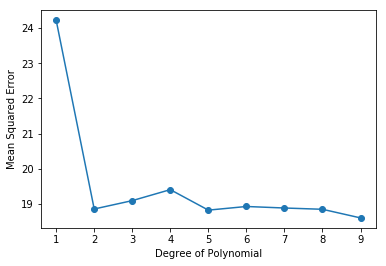

In [33]:
plt.plot(range(1,10), mse,'-o')
plt.ylabel('Mean Squared Error')
plt.xlabel('Degree of Polynomial')

In [34]:
p_order = np.arange(1,11)
r_state = np.arange(1,11)
X, Y = np.meshgrid(p_order, r_state, indexing='ij')
mse2 = np.zeros((p_order.size,r_state.size))

for (i, j), v in np.ndenumerate(mse2):
    poly= PolynomialFeatures(degree= int(X[i,j]))
    x_poly = poly.fit_transform(x[:,None])
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size =0.5, random_state =Y[i,j])
    ols= LinearRegression()
    ols.fit(x_train, y_train)
    pred= ols.predict(x_test)
    mse2[i,j]=mean_squared_error(y_test, pred)

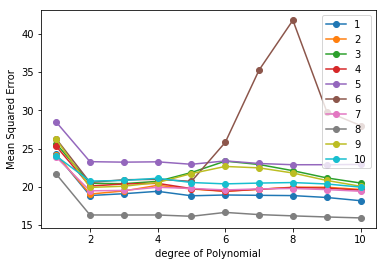

In [35]:
plt.plot(X,mse2,'-o')
plt.ylabel('Mean Squared Error')
plt.xlabel('degree of Polynomial')
plt.legend(r_state)

## Leavel-One-Out Cross-Validation

### Figure 5.4

In [36]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
loocv= LeaveOneOut()
loocv.get_n_splits(auto)
lm= LinearRegression()
mse3= []
for i in p_order:
    poly= PolynomialFeatures(degree= i)
    x_poly= poly.fit_transform(x[:,None])
    mse=(cross_val_score(lm,x_poly, y, cv =loocv, scoring='neg_mean_squared_error').mean())
    mse3.append(mse)

Text(0.5,1,'Leave-one-out CV error curve')

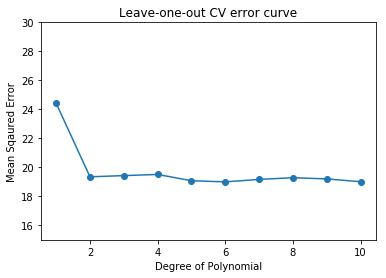

In [37]:
plt.plot(p_order, np.array(mse3)*(-1), '-o')
plt.ylabel('Mean Sqaured Error')
plt.xlabel('Degree of Polynomial')
plt.ylim(15,30)
plt.title('Leave-one-out CV error curve')

## 10-fold Cross-Validation

In [38]:
from sklearn.model_selection import KFold
fold= 10
mse4 = np.zeros((p_order.size,r_state.size))

for (i, j), v in np.ndenumerate(mse4):
    poly = PolynomialFeatures(degree =int(X[i,j]))
    x_poly = poly.fit_transform(x[:,None])
    kfold = KFold(n_splits= fold, random_state= Y[i,j])
    mse4[i,j]=cross_val_score(lm, x_poly, y, cv =kfold, scoring='neg_mean_squared_error').mean()

Text(0.5,1,'10 fold CV')

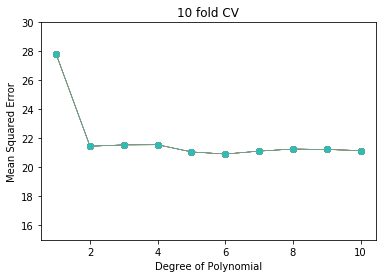

In [39]:
plt.plot(X, mse4*(-1),linewidth=0.5, alpha =0.8, marker ='o')
plt.ylim(15,30)
plt.ylabel('Mean Squared Error')
plt.xlabel('Degree of Polynomial')
plt.title ('10 fold CV')

## Bootstrap

In [ ]:
import statistics
def alpha_fn(x,y):
    return (statistics.variance(x),)

In [48]:
mu, sigma1, sigma2 = 0, 1, 1.25
x1 = np.random.normal(mu, sigma1, 100)
y1= np.random.normal(mu, sigma2, 100)

x2 = np.random.normal(mu, sigma1, 100)
y2= np.random.normal(mu, sigma2, 100)


x3 = np.random.normal(mu, sigma1, 100)
y3= np.random.normal(mu, sigma2, 100)

x4 = np.random.normal(mu, sigma1, 100)
y4= np.random.normal(mu, sigma2, 100)


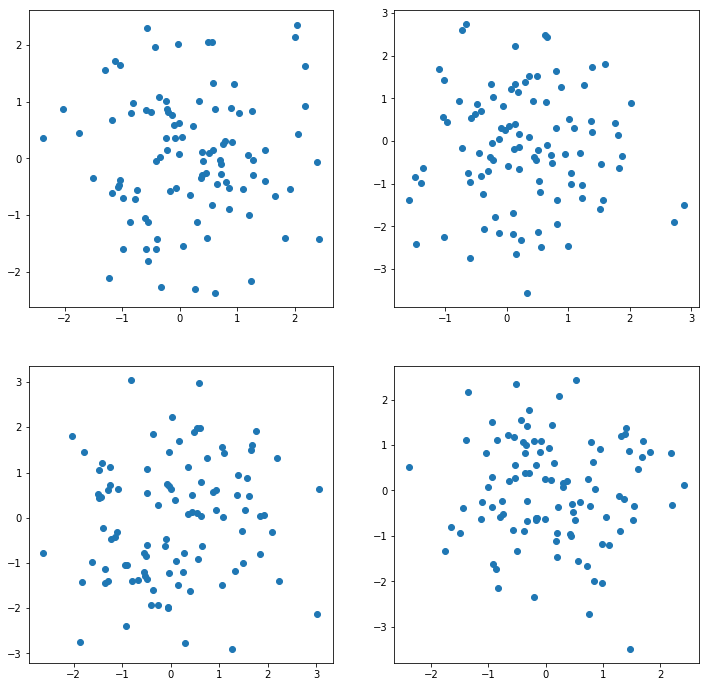

In [57]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2,2, figsize=(12,12))
ax1.scatter(x1,y1)
ax2.scatter(x2,y2)
ax3.scatter(x3,y3)
ax4.scatter(x4,y4)